In [24]:
import pyreadr
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_column', None)


In [54]:
shapefile_path_ =  "./data/shape_file.shp"
data_file_path = "./data/output_revised.csv"

In [3]:
gdf = gpd.read_file(shapefile_path_)

In [55]:
df = pd.read_csv(data_file_path)

In [56]:
df.head()

,Unnamed: 0,district,year,month,district_SPH,malaria_cases_u5,diarr_cases_u5,population,tmin,tmax,RH,precipitation,ndvi,ADM1_PT,ADM2_PT,ADM2_PCODE,ID,prop_poor,prop_Number_of_children_3plus,prop_Rural,prop_drinking_TreatedWater,prop_Time_get_Water60_plus_min,prop_No_Toilet,prop_Has_Electricity,prop_Has_Radio,prop_floor_Material_natural,prop_Sleeping_Rooms_3plus,prop_share_Toilet,prop_Has_sleeping_mosquito_net,prop_some_or_all_children_slept_under_net_last_night,prop_house_holds_share_toilet_9Plus,prop_Has_mobilephone,prop_dwelling_sprayed_last_12_Months,prop_with_3Plus_mosquito_nets,prop_children_under_mosquito_bed_nets_previous_night2Plus,prop_uneducated,number_of_doctors,Name_of_healthcare_facility1
0,1,alto molocue,2016,1,alto molocue,5361.0,361.0,398318.033138,21.294078,30.052979,84.781250,316.312258,0.249722,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0
1,2,alto molocue,2016,2,alto molocue,4417.0,213.0,398318.033138,21.270510,29.678297,87.459821,129.972256,0.323964,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0
2,3,alto molocue,2016,3,alto molocue,5778.0,193.0,398318.033138,22.023369,29.522761,89.664286,354.284895,0.312545,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0
3,4,alto molocue,2016,4,alto molocue,3573.0,92.0,398318.033138,19.596098,26.568178,90.843750,85.360640,0.289376,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0
4,5,alto molocue,2016,5,alto molocue,3306.0,124.0,398318.033138,16.402166,25.480120,85.982143,0.818778,0.298299,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0


In [6]:
gdf.head()

,ADM1_PT,ADM2_PT,ADM2_PCODE,district,geometry
0,Zambezia,Alto Molocue,MZ1101,alto molocue,"POLYGON ((37.37028 -15.10349, 37.37634 -15.110..."
1,Cabo Delgado,Ancuabe,MZ0101,ancuabe,"POLYGON ((40.12666 -12.58988, 40.12654 -12.590..."
2,Nampula,Angoche,MZ0701,angoche,"MULTIPOLYGON (((39.88100 -16.28956, 39.88129 -..."
3,Tete,Angonia,MZ1001,angonia,"POLYGON ((34.35950 -14.38620, 34.36094 -14.386..."
4,Cabo Delgado,Balama,MZ0102,balama,"POLYGON ((38.55654 -12.92312, 38.55762 -12.923..."


In [81]:
gdf.groupby('ADM1_PT').agg({"district":'count'})

,district
ADM1_PT,
Cabo Delgado,17
Gaza,14
Inhambane,14
Manica,12
Maputo,8
Maputo City,1
Nampula,23
Niassa,19
Sofala,13


In [84]:
gdf.groupby('ADM2_PCODE').agg({"district":'count'})

,district
ADM2_PCODE,
MZ0101,1
MZ0102,1
MZ0103,1
MZ0104,1
MZ0105,1
...,...
MZ1119,1
MZ1120,1
MZ1121,1


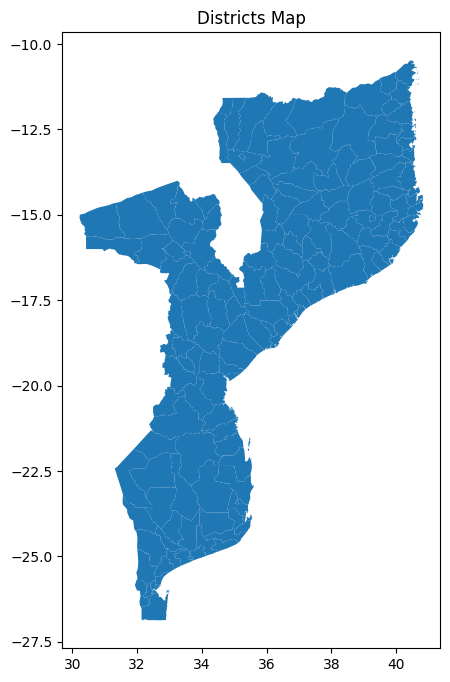

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax)
plt.title('Districts Map')
plt.show()


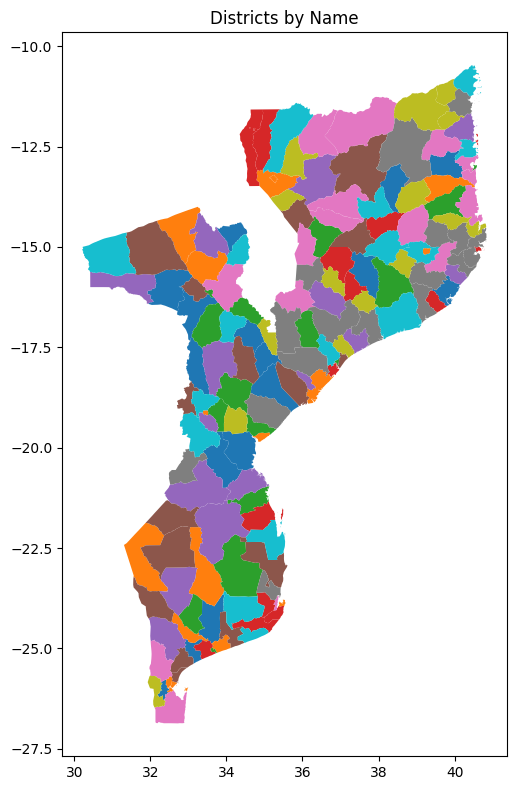

In [ ]:

fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(column='district', 
         categorical=True,
         legend=False,
         legend_kwds={'bbox_to_anchor': (1.1, 1)},
         ax=ax)
plt.title('Districts by Name')
plt.tight_layout()
plt.show()


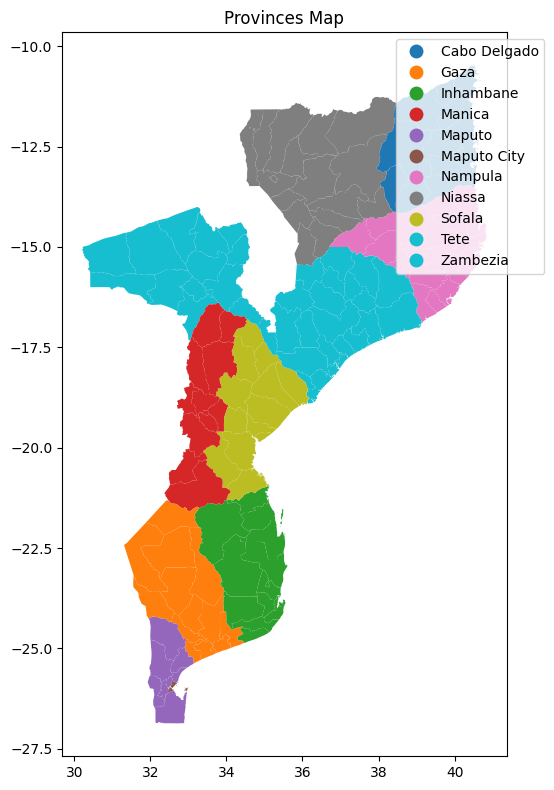

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(column='ADM1_PT',  # Province names
         categorical=True,
         legend=True,
         legend_kwds={'bbox_to_anchor': (1.1, 1)},
         ax=ax)
plt.title('Provinces Map')
plt.tight_layout()
plt.show()

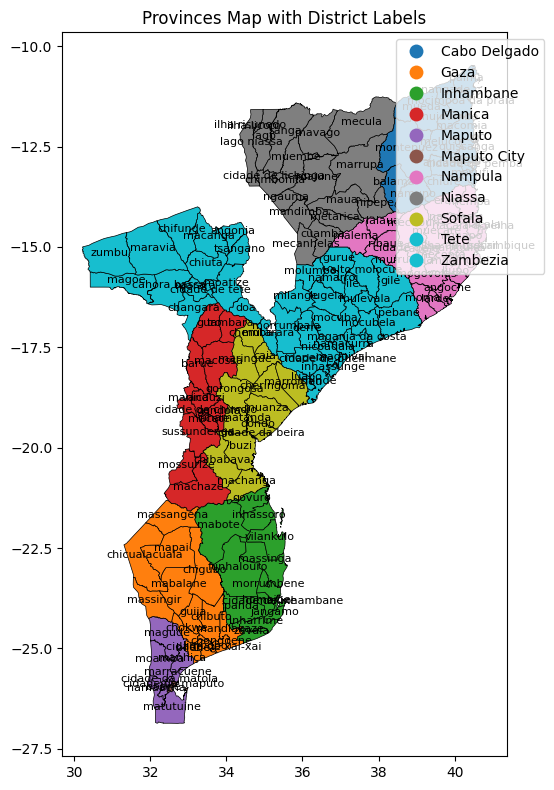

In [13]:

fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(column='ADM1_PT',
         categorical=True,
         legend=True,
         legend_kwds={'bbox_to_anchor': (1.1, 1)},
         edgecolor='black',
         linewidth=0.5,
         ax=ax)

for idx, row in gdf.iterrows():
    ax.annotate(text=row['district'], 
                xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                fontsize=8,
                ha='center')

plt.title('Provinces Map with District Labels')
plt.tight_layout()
plt.show()

In [57]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [58]:
df.shape

(5724, 37)

In [59]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [60]:
df.head()

,district,year,month,district_SPH,malaria_cases_u5,diarr_cases_u5,population,tmin,tmax,RH,precipitation,ndvi,ADM1_PT,ADM2_PT,ADM2_PCODE,ID,prop_poor,prop_Number_of_children_3plus,prop_Rural,prop_drinking_TreatedWater,prop_Time_get_Water60_plus_min,prop_No_Toilet,prop_Has_Electricity,prop_Has_Radio,prop_floor_Material_natural,prop_Sleeping_Rooms_3plus,prop_share_Toilet,prop_Has_sleeping_mosquito_net,prop_some_or_all_children_slept_under_net_last_night,prop_house_holds_share_toilet_9Plus,prop_Has_mobilephone,prop_dwelling_sprayed_last_12_Months,prop_with_3Plus_mosquito_nets,prop_children_under_mosquito_bed_nets_previous_night2Plus,prop_uneducated,number_of_doctors,Name_of_healthcare_facility1
0,alto molocue,2016,1,alto molocue,5361.0,361.0,398318.033138,21.294078,30.052979,84.781250,316.312258,0.249722,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0
1,alto molocue,2016,2,alto molocue,4417.0,213.0,398318.033138,21.270510,29.678297,87.459821,129.972256,0.323964,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0
2,alto molocue,2016,3,alto molocue,5778.0,193.0,398318.033138,22.023369,29.522761,89.664286,354.284895,0.312545,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0
3,alto molocue,2016,4,alto molocue,3573.0,92.0,398318.033138,19.596098,26.568178,90.843750,85.360640,0.289376,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0
4,alto molocue,2016,5,alto molocue,3306.0,124.0,398318.033138,16.402166,25.480120,85.982143,0.818778,0.298299,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0


In [61]:
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))


In [62]:
df['datetime']

0      2016-01-01
1      2016-02-01
2      2016-03-01
3      2016-04-01
4      2016-05-01
          ...    
5719   2018-08-01
5720   2018-09-01
5721   2018-10-01
5722   2018-11-01
5723   2018-12-01
Name: datetime, Length: 5724, dtype: datetime64[ns]

In [71]:
chifunde_df = df[df['district'] == 'chifunde'].reset_index()

In [ ]:

def subset_df(data, val_name):
    return data[data['district'] == val_name].reset_index()



plt.figure(figsize=(12,8))
df[df['district'] == 'chifunde'].reset_index()

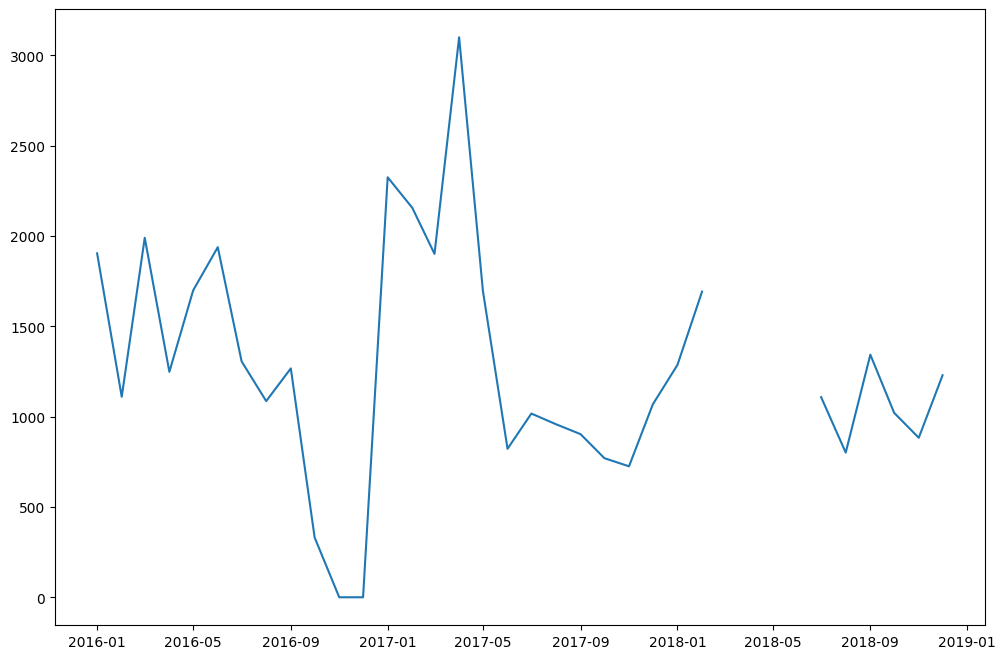

In [72]:
plt.figure(figsize=(12,8))
plt.plot(chifunde_df['datetime'], chifunde_df['malaria_cases_u5']);

In [66]:
df['district'].unique()

array(['alto molocue', 'ancuabe', 'angoche', 'angonia', 'balama', 'barue',
       'bilene', 'boane', 'buzi', 'cahora bassa', 'caia', 'changara',
       'chemba', 'cheringoma', 'chibabava', 'chibuto', 'chicualacuala',
       'chifunde', 'chigubo', 'chimbonila', 'chinde', 'chiure', 'chiuta',
       'chokwe', 'chongoene', 'cidade da beira', 'cidade da matola',
       'cidade de chimoio', 'cidade de inhambane', 'cidade de lichinga',
       'cidade de maputo', 'cidade de nampula', 'cidade de pemba',
       'cidade de quelimane', 'cidade de tete', 'cidade de xai-xai',
       'cuamba', 'derre', 'doa', 'dondo', 'erati', 'funhalouro', 'gile',
       'gondola', 'gorongosa', 'govuro', 'guija', 'guro', 'gurue',
       'homoine', 'ibo', 'ile', 'ilha de moçambique', 'ilha licom',
       'ilha risunodo', 'inharrime', 'inhassoro', 'inhassunge', 'jangamo',
       'lago', 'lago niassa', 'lalaua', 'larde', 'limpopo', 'liúpo',
       'luabo', 'lugela', 'mabalane', 'mabote', 'macanga', 'macate',
       'ma

In [73]:
df[(df['datetime'] >= '2018-03-01')].sort_values(by='month')

,district,year,month,district_SPH,malaria_cases_u5,diarr_cases_u5,population,tmin,tmax,RH,precipitation,ndvi,ADM1_PT,ADM2_PT,ADM2_PCODE,ID,prop_poor,prop_Number_of_children_3plus,prop_Rural,prop_drinking_TreatedWater,prop_Time_get_Water60_plus_min,prop_No_Toilet,prop_Has_Electricity,prop_Has_Radio,prop_floor_Material_natural,prop_Sleeping_Rooms_3plus,prop_share_Toilet,prop_Has_sleeping_mosquito_net,prop_some_or_all_children_slept_under_net_last_night,prop_house_holds_share_toilet_9Plus,prop_Has_mobilephone,prop_dwelling_sprayed_last_12_Months,prop_with_3Plus_mosquito_nets,prop_children_under_mosquito_bed_nets_previous_night2Plus,prop_uneducated,number_of_doctors,Name_of_healthcare_facility1,datetime
26,alto molocue,2018,3,alto molocue,NaN,NaN,4.261665e+05,19.489181,28.896045,90.111607,233.195131,0.350122,Zambezia,Alto Molocue,MZ1101,1,30.82,0.00,77.98,17.64,0.00,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.00,69.29,1.76,1.76,0.00,13.33,2433.0,17.0,2018-03-01
4490,mossurize,2018,3,mossurize,NaN,NaN,3.300190e+05,20.982242,29.270896,88.071429,48.922917,0.345436,Manica,Mossurize,MZ0409,125,63.67,1.83,78.09,1.83,16.48,76.46,5.49,47.27,0,16.40,10.83,61.66,0,0.00,81.82,0.00,5.47,1.83,57.14,1579.0,11.0,2018-03-01
4454,mossuril,2018,3,mossuril,NaN,NaN,1.395303e+05,22.180169,31.071738,82.482143,65.273713,0.289842,Nampula,Mossuril,MZ0716,124,50.84,0.75,78.04,46.81,2.11,35.97,32.78,29.07,0,8.46,5.73,85.44,0,0.09,54.11,6.78,10.76,1.62,30.80,1538.0,11.0,2018-03-01
1106,cidade de maputo,2018,3,cidade de maputo,NaN,NaN,1.189429e+06,21.004311,30.775063,87.803571,106.780323,0.207492,Maputo City,Cidade De Maputo,MZ0601,31,0.00,0.81,76.72,98.05,0.00,0.23,95.93,55.06,0,17.84,11.90,73.99,0,0.35,96.87,24.24,13.07,0.52,4.46,7372.0,36.0,2018-03-01
4418,morrumbene,2018,3,morrumbene,NaN,NaN,1.433836e+05,23.447634,30.339850,82.906250,56.420262,0.354995,Inhambane,Morrumbene,MZ0311,123,0.00,3.57,77.69,25.00,0.00,0.00,35.71,64.29,0,0.00,3.57,89.29,0,0.00,100.00,0.00,7.14,0.00,8.33,1565.0,11.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815,memba,2018,12,memba,2756.0,127.0,3.287006e+05,23.163256,31.769700,73.989583,160.163046,0.150455,Nampula,Memba,MZ0711,106,10.71,0.00,78.20,85.71,3.57,0.00,67.86,35.71,0,17.86,14.29,100.00,0,0.00,64.29,0.00,14.29,0.00,6.25,1741.0,12.0,2018-12-01
5183,nicoadala,2018,12,nicoadala,1858.0,101.0,1.754566e+05,23.863128,32.526988,77.923611,252.760087,0.197278,Zambezia,Nicoadala,MZ1122,144,67.86,0.00,78.27,7.14,0.00,67.86,3.57,25.00,0,3.57,10.71,85.71,0,0.00,39.29,10.71,7.14,3.57,40.00,1164.0,8.0,2018-12-01
1619,gorongosa,2018,12,gorongosa,4184.0,165.0,1.883836e+05,21.775856,30.871950,73.615741,253.503728,0.328664,Sofala,Gorongosa,MZ0908,45,67.86,0.00,78.22,7.14,10.71,82.14,3.57,46.43,0,7.14,0.00,100.00,0,0.00,71.43,0.00,14.29,17.86,40.00,2066.0,14.0,2018-12-01
3923,milange,2018,12,milange,4435.0,72.0,7.005445e+05,19.359328,27.278578,75.851852,284.674751,0.149356,Zambezia,Milange,MZ1113,109,45.79,3.57,78.12,1.39,0.00,23.98,16.69,44.06,0,8.35,22.63,93.46,0,0.00,57.37,45.04,10.53,3.57,13.33,2200.0,15.0,2018-12-01


In [74]:
chifunde_df[chifunde_df['datetime'] >= '2018-03-01']

,index,district,year,month,district_SPH,malaria_cases_u5,diarr_cases_u5,population,tmin,tmax,RH,precipitation,ndvi,ADM1_PT,ADM2_PT,ADM2_PCODE,ID,prop_poor,prop_Number_of_children_3plus,prop_Rural,prop_drinking_TreatedWater,prop_Time_get_Water60_plus_min,prop_No_Toilet,prop_Has_Electricity,prop_Has_Radio,prop_floor_Material_natural,prop_Sleeping_Rooms_3plus,prop_share_Toilet,prop_Has_sleeping_mosquito_net,prop_some_or_all_children_slept_under_net_last_night,prop_house_holds_share_toilet_9Plus,prop_Has_mobilephone,prop_dwelling_sprayed_last_12_Months,prop_with_3Plus_mosquito_nets,prop_children_under_mosquito_bed_nets_previous_night2Plus,prop_uneducated,number_of_doctors,Name_of_healthcare_facility1,datetime
26,638,chifunde,2018,3,chifunde,NaN,NaN,224297.567494,20.140394,26.330196,88.705357,195.430162,0.293046,Tete,Chifunde,MZ1004,18,82.14,0.0,78.56,35.71,0.0,60.71,7.14,14.29,0,0.0,0.0,85.71,0,0.0,57.14,0.0,3.57,3.57,40.0,1135.0,8.0,2018-03-01
27,639,chifunde,2018,4,chifunde,NaN,NaN,224297.567494,18.633029,26.018537,73.392857,117.209915,0.299164,Tete,Chifunde,MZ1004,18,82.14,0.0,78.56,35.71,0.0,60.71,7.14,14.29,0,0.0,0.0,85.71,0,0.0,57.14,0.0,3.57,3.57,40.0,1135.0,8.0,2018-04-01
28,640,chifunde,2018,5,chifunde,NaN,NaN,224297.567494,17.748538,25.265413,64.678571,19.821419,0.286728,Tete,Chifunde,MZ1004,18,82.14,0.0,78.56,35.71,0.0,60.71,7.14,14.29,0,0.0,0.0,85.71,0,0.0,57.14,0.0,3.57,3.57,40.0,1135.0,8.0,2018-05-01
29,641,chifunde,2018,6,chifunde,NaN,NaN,224297.567494,12.747766,24.032714,54.392857,0.165198,0.279726,Tete,Chifunde,MZ1004,18,82.14,0.0,78.56,35.71,0.0,60.71,7.14,14.29,0,0.0,0.0,85.71,0,0.0,57.14,0.0,3.57,3.57,40.0,1135.0,8.0,2018-06-01
30,642,chifunde,2018,7,chifunde,1108.0,59.0,224297.567494,13.574638,22.591026,62.750000,0.061031,0.148519,Tete,Chifunde,MZ1004,18,82.14,0.0,78.56,35.71,0.0,60.71,7.14,14.29,0,0.0,0.0,85.71,0,0.0,57.14,0.0,3.57,3.57,40.0,1135.0,8.0,2018-07-01
31,643,chifunde,2018,8,chifunde,801.0,109.0,224297.567494,14.699175,26.543459,43.044643,0.073921,0.093935,Tete,Chifunde,MZ1004,18,82.14,0.0,78.56,35.71,0.0,60.71,7.14,14.29,0,0.0,0.0,85.71,0,0.0,57.14,0.0,3.57,3.57,40.0,1135.0,8.0,2018-08-01
32,644,chifunde,2018,9,chifunde,1343.0,112.0,224297.567494,18.414895,28.800791,38.285714,1.683577,0.067204,Tete,Chifunde,MZ1004,18,82.14,0.0,78.56,35.71,0.0,60.71,7.14,14.29,0,0.0,0.0,85.71,0,0.0,57.14,0.0,3.57,3.57,40.0,1135.0,8.0,2018-09-01
33,645,chifunde,2018,10,chifunde,1021.0,44.0,224297.567494,17.422890,29.046450,40.866071,17.794425,0.111253,Tete,Chifunde,MZ1004,18,82.14,0.0,78.56,35.71,0.0,60.71,7.14,14.29,0,0.0,0.0,85.71,0,0.0,57.14,0.0,3.57,3.57,40.0,1135.0,8.0,2018-10-01
34,646,chifunde,2018,11,chifunde,883.0,4.0,224297.567494,19.072050,29.009745,49.750000,104.464618,0.102418,Tete,Chifunde,MZ1004,18,82.14,0.0,78.56,35.71,0.0,60.71,7.14,14.29,0,0.0,0.0,85.71,0,0.0,57.14,0.0,3.57,3.57,40.0,1135.0,8.0,2018-11-01
35,647,chifunde,2018,12,chifunde,1229.0,124.0,224297.567494,19.980591,25.971892,69.527778,322.865375,0.129347,Tete,Chifunde,MZ1004,18,82.14,0.0,78.56,35.71,0.0,60.71,7.14,14.29,0,0.0,0.0,85.71,0,0.0,57.14,0.0,3.57,3.57,40.0,1135.0,8.0,2018-12-01
